## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("train.csv") 
df_comp=raw_csv_data.copy()
df_comp.head()
df_comp.date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_26128\3763393036.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_comp.date = pd.to_datetime(df_comp.Date, dayfirst = True)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
del df_comp['Store']
del df_comp['IsHoliday']
del df_comp['Dept']

In [4]:
data = df_comp[:143]
data.tail()
data.isna().sum()

Date            0
Weekly_Sales    0
dtype: int64

In [5]:
date_range = pd.date_range(start='2010-02-05', periods=len(data), freq='W')

data["dates"] = date_range
data.set_index("dates", inplace = True)
del data['Date']
data.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_26128\1042217197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dates"] = date_range


,Weekly_Sales
dates,
2010-02-07,24924.50
2010-02-14,46039.49
2010-02-21,41595.55
2010-02-28,19403.54
2010-03-07,21827.90


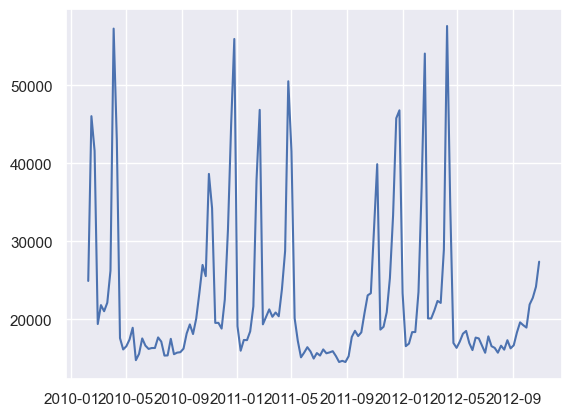

In [6]:
plt.plot(data)
plt.show()

In [7]:
data['market_value'] = data.Weekly_Sales
del data['Weekly_Sales']
data.head()

C:\Users\sshre\AppData\Local\Temp\ipykernel_26128\3943506590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['market_value'] = data.Weekly_Sales


,market_value
dates,
2010-02-07,24924.50
2010-02-14,46039.49
2010-02-21,41595.55
2010-02-28,19403.54
2010-03-07,21827.90


In [8]:
size = int(len(data)*0.8)
df, df_test = data.iloc[:size], data.iloc[size:]

## The ACF

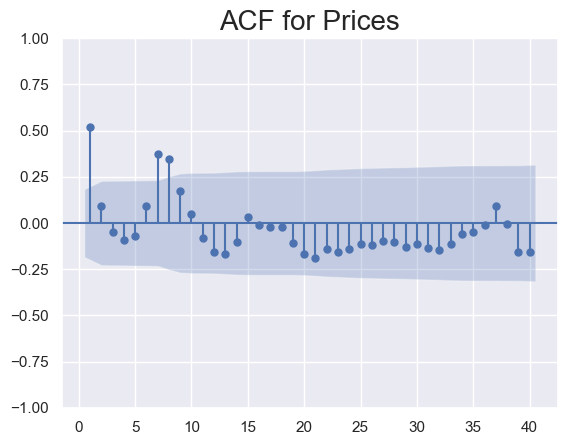

In [9]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

In [10]:
import warnings
warnings.filterwarnings("ignore")

## The PACF

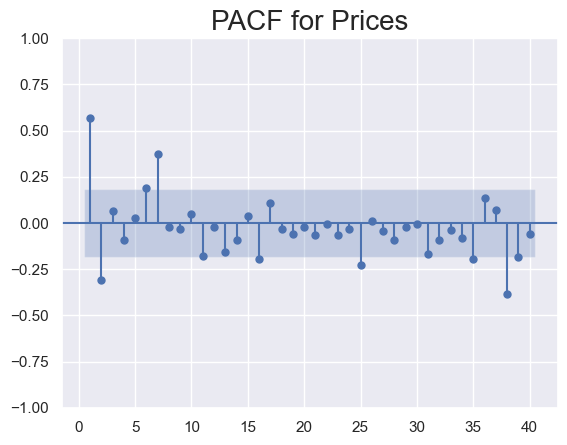

In [11]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## The AR(1) Model

In [12]:
model_ar = ARIMA(df.market_value, order=(1,0,0))

In [13]:
results_ar = model_ar.fit()

In [14]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                  114
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1198.653
Date:                Thu, 20 Jul 2023   AIC                           2403.307
Time:                        03:46:10   BIC                           2411.515
Sample:                    02-07-2010   HQIC                          2406.638
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.347e+04   2684.091      8.742      0.000    1.82e+04    2.87e+04
ar.L1          0.5641      0.078      7.269      0.000       0.412       0.716
sigma2       7.99e+07      0.812   9.84e+07      0.000    7.99e+07    7.99e+07
===================================================================================
Ljung-Box (L1) (Q):                   3.05   Jarque-Bera (JB):                58.91
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             1.08
Prob(H) (two-sided):                  0.23   Kurtosis:                         5.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.86e+22. Standard errors may be unstable.
"""

## Higher-Lag AR Models

In [15]:
model_ar_2 = ARIMA(df.market_value, order=(2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                  114
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1193.370
Date:                Thu, 20 Jul 2023   AIC                           2394.740
Time:                        03:46:10   BIC                           2405.685
Sample:                    02-07-2010   HQIC                          2399.182
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.347e+04   1745.996     13.440      0.000       2e+04    2.69e+04
ar.L1          0.7438      0.091      8.172      0.000       0.565       0.922
ar.L2         -0.3226      0.106     -3.037      0.002      -0.531      -0.114
sigma2       6.95e+07      0.353   1.97e+08      0.000    6.95e+07    6.95e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                59.08
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             1.12
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.22e+23. Standard errors may be unstable.
"""

In [16]:
model_ar_3 = ARIMA(df.market_value, order=(3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                  114
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1193.129
Date:                Thu, 20 Jul 2023   AIC                           2396.258
Time:                        03:46:10   BIC                           2409.939
Sample:                    02-07-2010   HQIC                          2401.810
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.347e+04   1912.564     12.269      0.000    1.97e+04    2.72e+04
ar.L1          0.7638      0.098      7.803      0.000       0.572       0.956
ar.L2         -0.3711      0.149     -2.493      0.013      -0.663      -0.079
ar.L3          0.0678      0.190      0.356      0.722      -0.305       0.441
sigma2      6.981e+07      0.420   1.66e+08      0.000    6.98e+07    6.98e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                61.18
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                             1.14
Prob(H) (two-sided):                  0.17   Kurtosis:                         5.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.41e+23. Standard errors may be unstable.
"""

In [17]:
model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                  114
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -1192.669
Date:                Thu, 20 Jul 2023   AIC                           2397.338
Time:                        03:46:10   BIC                           2413.755
Sample:                    02-07-2010   HQIC                          2404.001
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.347e+04   1906.523     12.308      0.000    1.97e+04    2.72e+04
ar.L1          0.7685      0.097      7.937      0.000       0.579       0.958
ar.L2         -0.4019      0.164     -2.448      0.014      -0.724      -0.080
ar.L3          0.1400      0.288      0.486      0.627      -0.424       0.704
ar.L4         -0.0976      0.293     -0.334      0.739      -0.671       0.476
sigma2      6.892e+07      0.398   1.73e+08      0.000    6.89e+07    6.89e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                60.74
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                             1.12
Prob(H) (two-sided):                  0.17   Kurtosis:                         5.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.31e+23. Standard errors may be unstable.
"""

## LLR Test

In [18]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher-Lag AR Models

In [19]:
LLR_test(model_ar_2, model_ar_3)

0.487

In [20]:
LLR_test(model_ar_3, model_ar_4)

0.338

In [21]:
model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                  114
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -1192.669
Date:                Thu, 20 Jul 2023   AIC                           2397.338
Time:                        03:46:10   BIC                           2413.755
Sample:                    02-07-2010   HQIC                          2404.001
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.347e+04   1906.523     12.308      0.000    1.97e+04    2.72e+04
ar.L1          0.7685      0.097      7.937      0.000       0.579       0.958
ar.L2         -0.4019      0.164     -2.448      0.0

In [22]:
model_ar_5 = ARIMA(df.market_value, order=(5,0,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                  114
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -1192.620
Date:                Thu, 20 Jul 2023   AIC                           2399.240
Time:                        03:46:10   BIC                           2418.394
Sample:                    02-07-2010   HQIC                          2407.014
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.347e+04   2147.959     10.925      0.000    1.93e+04    2.77e+04
ar.L1          0.7708      0.097      7.931      0.000       0.580       0.961
ar.L2         -0.4048      0.165     -2.457      0.0

In [23]:
model_ar_6 = ARIMA(df.market_value, order=(6,0,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                  114
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -1190.675
Date:                Thu, 20 Jul 2023   AIC                           2397.350
Time:                        03:46:11   BIC                           2419.239
Sample:                    02-07-2010   HQIC                          2406.234
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.347e+04   2578.091      9.102      0.000    1.84e+04    2.85e+04
ar.L1          0.7645      0.098      7.830      0.000       0.573       0.956
ar.L2         -0.3848      0.160     -2.400      0.0

In [40]:
model_ar_7 = ARIMA(df.market_value, order=(7,0,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                  114
Model:                 ARIMA(7, 0, 7)   Log Likelihood               -1179.896
Date:                Thu, 20 Jul 2023   AIC                           2391.792
Time:                        03:46:59   BIC                           2435.571
Sample:                    02-07-2010   HQIC                          2409.560
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.347e+04   3313.871      7.081      0.000     1.7e+04       3e+04
ar.L1          0.7309      0.456      1.604      0.109      -0.162       1.624
ar.L2         -0.4312      0.516     -0.836      0.4

In [36]:
model_ar_8 = ARIMA(df.market_value, order=(8,0,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                  114
Model:                 ARIMA(8, 0, 0)   Log Likelihood               -1183.143
Date:                Thu, 20 Jul 2023   AIC                           2386.285
Time:                        03:46:36   BIC                           2413.647
Sample:                    02-07-2010   HQIC                          2397.390
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.347e+04   3642.802      6.442      0.000    1.63e+04    3.06e+04
ar.L1          0.6900      0.091      7.603      0.000       0.512       0.868
ar.L2         -0.3359      0.161     -2.092      0.0

In [37]:
print("LLR test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))

LLR test: 0.0


In [38]:
pred = results_ar_7.predict(start=len(df), end = len(data) , dynamic = False)

<function matplotlib.pyplot.show(close=None, block=None)>

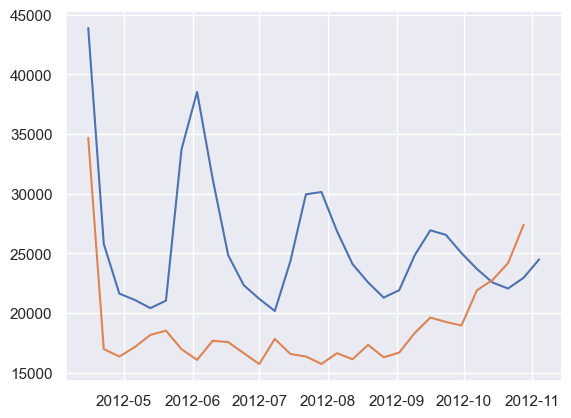

<Figure size 4000x500 with 0 Axes>

In [39]:
plt.plot(pred)
plt.plot(df_test)
plt.figure(figsize=(40,5))
plt.show

## Analysing the Residuals

In [29]:
df['res_price'] = results_ar_7.resid

In [30]:
df.res_price.mean()

196.4802590412942

In [31]:
df.res_price.var()

58235079.60492235

In [32]:
sts.adfuller(df.res_price)

(-10.196978565918489,
 6.10994428373692e-18,
 0,
 113,
 {'1%': -3.489589552580676,
  '5%': -2.887477210140433,
  '10%': -2.580604145195395},
 2063.669120316359)

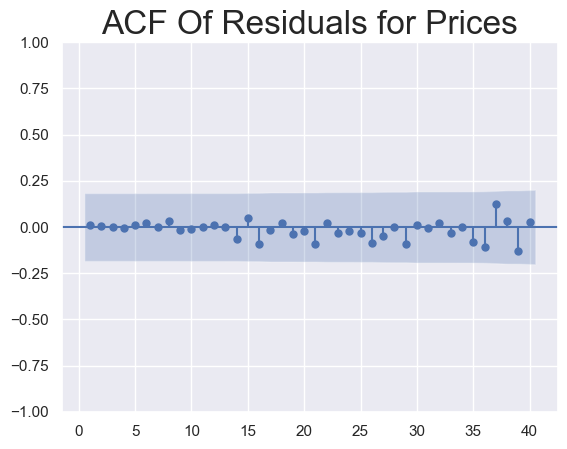

In [33]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

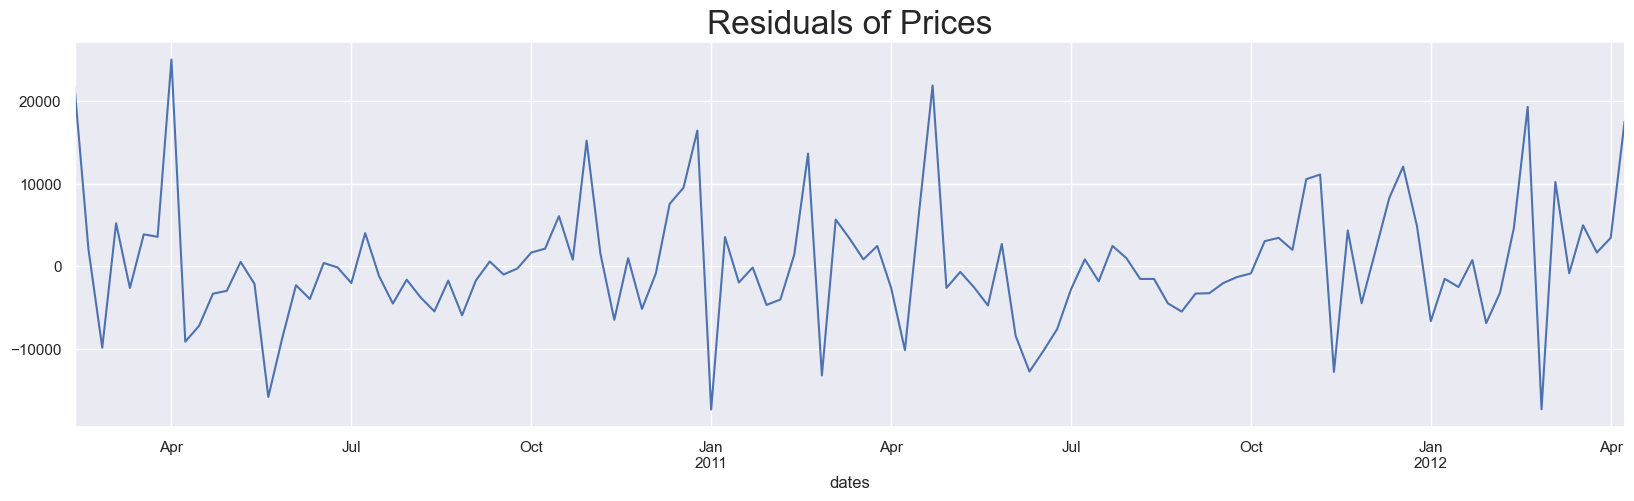

In [34]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()